In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
ICUS_df = pd.read_csv('ICUSTAYS.csv')
ICUS_df

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202
...,...,...,...,...,...,...,...,...,...,...,...,...
61527,59806,94944,143774,201233,metavision,CSRU,CSRU,15,15,2104-04-15 10:18:16,2104-04-17 14:51:00,2.1894
61528,59807,94950,123750,283653,metavision,CCU,CCU,7,7,2155-12-08 05:33:16,2155-12-10 17:24:58,2.4942
61529,59808,94953,196881,241585,metavision,SICU,SICU,57,57,2160-03-03 16:09:11,2160-03-04 14:22:33,0.9259
61530,59809,94954,118475,202802,metavision,CSRU,CSRU,15,15,2183-03-25 09:53:10,2183-03-27 17:55:03,2.3346


In [14]:
ICUS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ROW_ID          61532 non-null  int64  
 1   SUBJECT_ID      61532 non-null  int64  
 2   HADM_ID         61532 non-null  int64  
 3   ICUSTAY_ID      61532 non-null  int64  
 4   DBSOURCE        61532 non-null  object 
 5   FIRST_CAREUNIT  61532 non-null  object 
 6   LAST_CAREUNIT   61532 non-null  object 
 7   FIRST_WARDID    61532 non-null  int64  
 8   LAST_WARDID     61532 non-null  int64  
 9   INTIME          61532 non-null  object 
 10  OUTTIME         61522 non-null  object 
 11  LOS             61522 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 5.6+ MB


In [5]:
ICU_S_df.isnull().sum()

ROW_ID             0
SUBJECT_ID         0
HADM_ID            0
ICUSTAY_ID         0
DBSOURCE           0
FIRST_CAREUNIT     0
LAST_CAREUNIT      0
FIRST_WARDID       0
LAST_WARDID        0
INTIME             0
OUTTIME           10
LOS               10
dtype: int64

In [15]:
ICUS_df.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,FIRST_WARDID,LAST_WARDID,LOS
count,61532.000000,61532.000000,61532.000000,61532.000000,61532.000000,61532.000000,61522.000000
mean,30766.500000,33888.605912,149954.470649,249962.710248,33.085663,32.978206,4.917972
std,17762.902719,28127.690913,28898.895904,28890.574867,19.102204,19.028609,9.638784
min,1.000000,2.000000,100001.000000,200001.000000,7.000000,7.000000,0.000100
25%,15383.750000,12047.500000,124933.750000,224935.500000,14.000000,14.000000,1.108025
50%,30766.500000,24280.500000,149911.500000,249940.000000,33.000000,33.000000,2.092250
75%,46149.250000,54191.500000,174997.250000,274972.500000,52.000000,52.000000,4.483175
max,61532.000000,99999.000000,199999.000000,299999.000000,57.000000,57.000000,173.072500


In [16]:
ICUS_df.nunique()

ROW_ID            61532
SUBJECT_ID        46476
HADM_ID           57786
ICUSTAY_ID        61532
DBSOURCE              3
FIRST_CAREUNIT        6
LAST_CAREUNIT         6
FIRST_WARDID         16
LAST_WARDID          17
INTIME            61531
OUTTIME           61518
LOS               40175
dtype: int64

In [17]:
# Replace "No Record" with NaN in 'OUTTIME' column
ICUS_df['OUTTIME'] = ICUS_df['OUTTIME'].replace('No Record', np.nan)

# Convert 'INTIME' and 'OUTTIME' to datetime
ICUS_df['INTIME'] = pd.to_datetime(ICUS_df['INTIME'])
ICUS_df['OUTTIME'] = pd.to_datetime(ICUS_df['OUTTIME'])
ICUS_df

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202
...,...,...,...,...,...,...,...,...,...,...,...,...
61527,59806,94944,143774,201233,metavision,CSRU,CSRU,15,15,2104-04-15 10:18:16,2104-04-17 14:51:00,2.1894
61528,59807,94950,123750,283653,metavision,CCU,CCU,7,7,2155-12-08 05:33:16,2155-12-10 17:24:58,2.4942
61529,59808,94953,196881,241585,metavision,SICU,SICU,57,57,2160-03-03 16:09:11,2160-03-04 14:22:33,0.9259
61530,59809,94954,118475,202802,metavision,CSRU,CSRU,15,15,2183-03-25 09:53:10,2183-03-27 17:55:03,2.3346


In [18]:
ICUS_df.isnull().sum()

ROW_ID             0
SUBJECT_ID         0
HADM_ID            0
ICUSTAY_ID         0
DBSOURCE           0
FIRST_CAREUNIT     0
LAST_CAREUNIT      0
FIRST_WARDID       0
LAST_WARDID        0
INTIME             0
OUTTIME           10
LOS               10
dtype: int64

##### OUTTIME provides the date and time the patient was transferred out of the ICU. This being Null means the patient never left the ICU, which can mean the patient died in the ICU, which we will have to map it with admissions table which has deathtime coulmn. Similiary,LOS is the length of stay for the patient for the given ICU stay, which may include one or more ICU units. The length of stay is measured in fractional days.

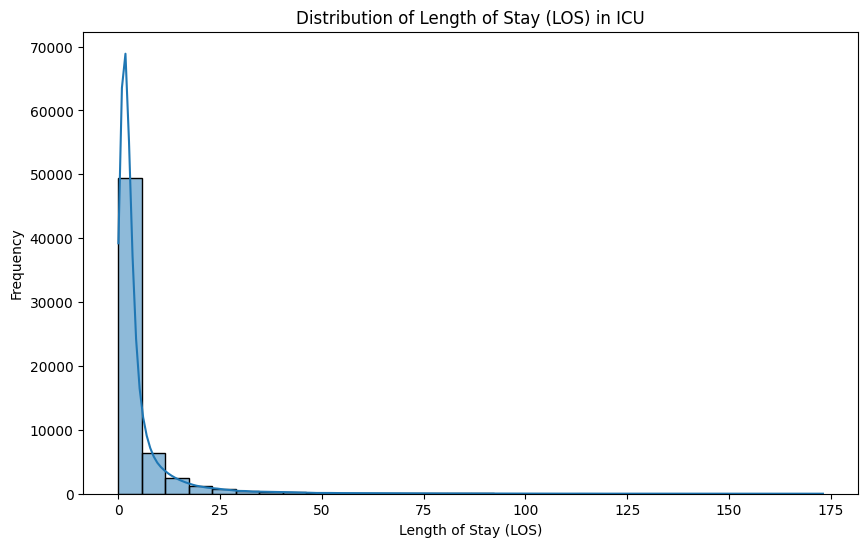

Average LOS: 4.91797158089789
Median LOS: 2.09225
Maximum LOS: 173.0725


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the distribution of Length of Stay (LOS)
plt.figure(figsize=(10, 6))
sns.histplot(ICUS_df['LOS'], bins=30, kde=True)
plt.title('Distribution of Length of Stay (LOS) in ICU')
plt.xlabel('Length of Stay (LOS)')
plt.ylabel('Frequency')
plt.show()

# Display statistics
print("Average LOS:", ICUS_df['LOS'].mean())
print("Median LOS:", ICUS_df['LOS'].median())
print("Maximum LOS:", ICUS_df['LOS'].max())


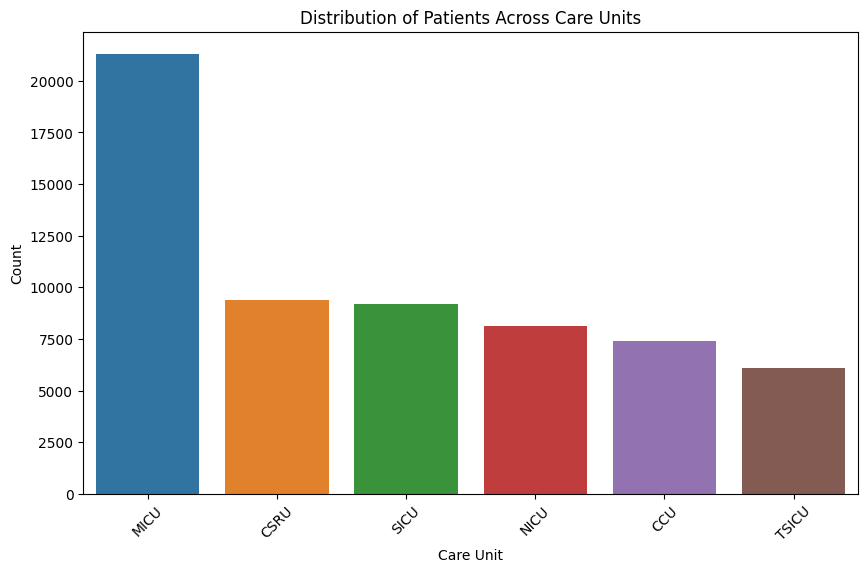

In [20]:
# Explore the distribution of Care Units
plt.figure(figsize=(10, 6))
sns.countplot(x='LAST_CAREUNIT', data=ICUS_df, order=ICU_S_df['LAST_CAREUNIT'].value_counts().index)
plt.title('Distribution of Patients Across Care Units')
plt.xlabel('Care Unit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### References:
https://physionet.org/content/mimiciii/1.4/

https://mimic.mit.edu/docs/iii/tables/

https://mit-lcp.github.io/mimic-schema-spy/index.html

In [21]:
#save clean data into csv file

csv_path = 'ICU_STAYS_table_clean.csv'
ICUS_df.to_csv(csv_path,
                   index = False)